Загружаем данные

In [1]:
import pandas as pd
import scipy.stats as st
import seaborn as sns

In [2]:
dating_data=pd.read_csv('dating_data.csv')

### Метрики, на которые должен повлиять новый алгоритм:
- средняя доля мэтчей на пользователя;
- количество действий на пользователя.

### Рассчитаем среднюю долю мэтчей на пользователя по каждой группе:

In [3]:
control_mean=dating_data.query('group==0').groupby('user_id_1', as_index=False).is_match.mean() \
                        .rename(columns={'is_match':'mn'}).round(2)

In [4]:
test_mean=dating_data.query('group==1').groupby('user_id_1', as_index=False).is_match.mean() \
                     .rename(columns={'is_match':'mn'}).round(2)

 Посмотрим нормальное ли распределение в двух группах:

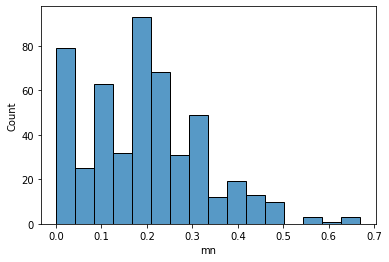

In [5]:
sns.histplot(data=control_mean, x='mn')

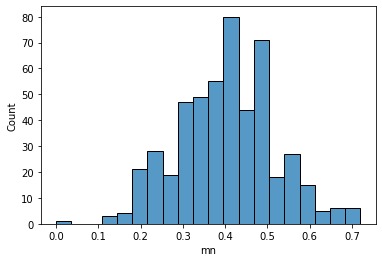

In [6]:
sns.histplot(data=test_mean, x='mn')

In [7]:
st.shapiro(control_mean)

ShapiroResult(statistic=0.7642300724983215, pvalue=1.4374116252452451e-35)

In [8]:
st.shapiro(test_mean)

ShapiroResult(statistic=0.763656497001648, pvalue=1.5304317993036744e-35)

Теперь проверим равно ли стандартное отклонение двух выборок:

In [9]:
st.levene(control_mean['mn'], test_mean['mn'])

LeveneResult(statistic=10.035149464201396, pvalue=0.001582466737859385)

Применим t-критерий Уэлча

In [10]:
st.ttest_ind(control_mean.mn, test_mean.mn, equal_var=False)

Ttest_indResult(statistic=-26.481431782585016, pvalue=7.890669157069948e-117)

Обе переменные, которые исследуются в рамках проверки этой гипотезы являются количественными. Стандартные отклонения наших выборок не равны. Распределние не является нормальным, но несмотря на это для сравнения средних значений доли мэтчей между двумя группами будем использовать t-критерий Уэлча, так как выборка достаточно большая. P-value меньше, чем 0.05. Это говорит нам, что мы можем отвергнуть нулевую гипотезу и сделать вывод, что средние между двумя группами статистически различаются. 

### Рассчитаем количество действий на пользователя в каждой группе:

In [11]:
control=dating_data.query('group==0').groupby('user_id_1').is_match.count()

In [12]:
test=dating_data.query('group==1').groupby('user_id_1').is_match.count()

Проверим равно ли стандартное отклонение двух выборок:

In [13]:
st.levene(control, test)

LeveneResult(statistic=0.4804538582845789, pvalue=0.48837808141783545)

Применим t-критерий Стьюдента

In [14]:
st.ttest_ind(control, test)

Ttest_indResult(statistic=-51.85383774946492, pvalue=1.8942877064043142e-285)

Обе переменные — количественные. Стандартные отклонения выборок почти равны. Поэтому для сравнения количества действий на пользователя в двух группах мы применим t-критерий Стьюдента. P-value меньше, чем 0.05. Это значит, что мы можем отвергнуть нулевую гипотезу и сделать такой вывод: количество действий на пользователя в двух группах статистически различаются.